<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_Data-AI/blob/master/EmotionPrediction_with_Google_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Emotion Prediction _ add category(neutral)

Prepare dataset

In [ ]:
from fastai.vision import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = Path('gdrive/My Drive/fastai-v3/data/songrec/category')

In [ ]:
path.ls()

[PosixPath('gdrive/My Drive/fastai-v3/data/songrec/category/happy'),
 PosixPath('gdrive/My Drive/fastai-v3/data/songrec/category/sad'),
 PosixPath('gdrive/My Drive/fastai-v3/data/songrec/category/angry'),
 PosixPath('gdrive/My Drive/fastai-v3/data/songrec/category/models')]

In [ ]:
classes = ['happy','angry','sad']

In [ ]:
# You will need the following statement  for every category.
# For example, Do this when downloading "saturn.csv' file:
folder = 'happy'
dest = path/folder
file = 'happy.csv'
download_images(dest/file, dest, max_pics=300)

In [ ]:
folder = 'angry'
dest = path/folder
file = 'angry.csv'
download_images(dest/file, dest, max_pics=300)

In [ ]:
folder = 'sad'
dest = path/folder
file = 'sad.csv'
download_images(dest/file, dest, max_pics=300)

In [ ]:
classes = ['happy','angry','sad']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

happy


angry


sad


View data & Train model

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,).normalize(imagenet_stats)

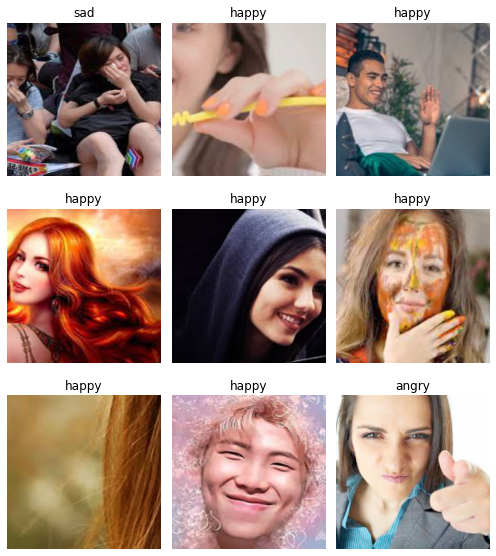

In [ ]:
data.show_batch(rows=3, figsize=(7,8)) #Look

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['angry', 'happy', 'sad'], 3, 502, 125)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.055306,1.706074,0.624000,01:06
1,1.772988,1.438511,0.440000,00:09
2,1.572361,1.362650,0.368000,00:06
3,1.334835,1.256737,0.384000,00:05
4,1.171782,1.282150,0.360000,00:05
5,1.043662,1.190523,0.320000,00:06
6,0.956671,1.111730,0.296000,00:06
7,0.872297,1.051260,0.264000,00:06
8,0.794843,1.035362,0.288000,00:06
9,0.747100,1.029598,0.280000,00:06


In [ ]:
learn.save('stage-1')

Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

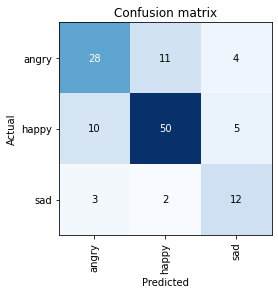

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val=2)

[('angry', 'happy', 11),
 ('happy', 'angry', 10),
 ('happy', 'sad', 5),
 ('angry', 'sad', 4),
 ('sad', 'angry', 3),
 ('sad', 'happy', 2)]

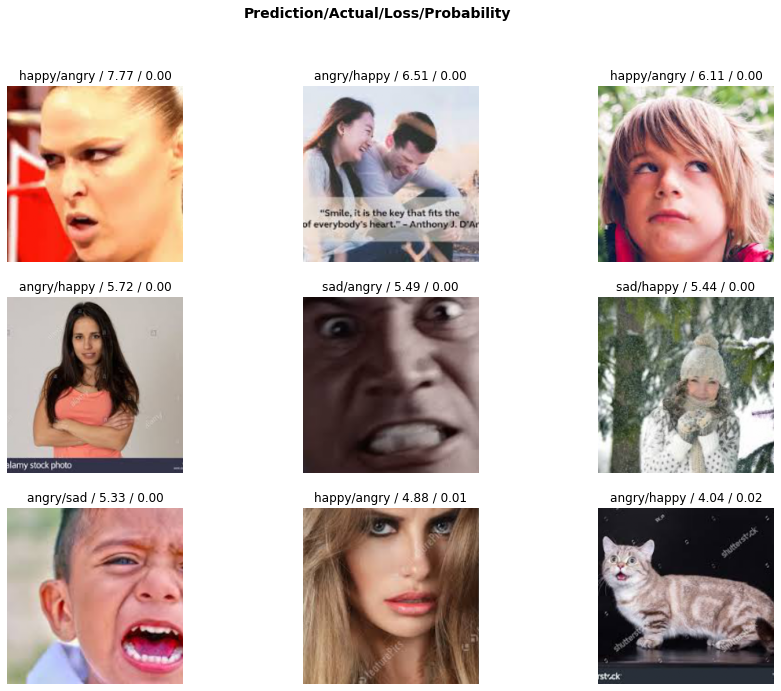

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.564989,1.373844,0.336000,00:07


In [ ]:
learn.load('stage-1');


In [ ]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


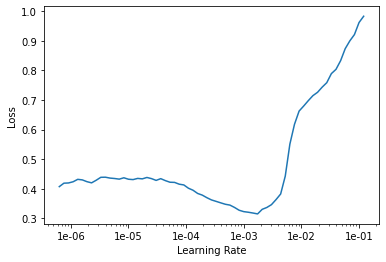

In [ ]:
learn.recorder.plot()
# 

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.449177,0.971578,0.296000,00:06
1,0.435555,0.936096,0.320000,00:06


In [ ]:
learn.save('stage-2')


Predict the Input Image

In [ ]:
learn.export()
#You can use this code to load on your own laptop
#learn = load_learner(dataPath)


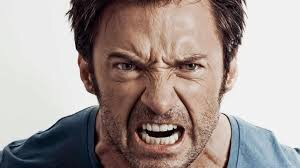

In [ ]:
imgPath=('gdrive/My Drive/fastai-v3/data/songrec/test/angry.jpg')
img = open_image(imgPath)
img

In [ ]:
learn.predict(img)
pred, index, probs = learn.predict(img)

classes = learn.data.classes
predictedClass = classes[index]  

print(predictedClass)

angry
